In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 

In [2]:
!cd /content/sample_data

In [3]:
dataset = pd.read_csv("/content/sample_data/california_housing_test.csv")

In [4]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [5]:
#We will take two features from the data 
X = dataset["longitude"]
Y = dataset["latitude"]

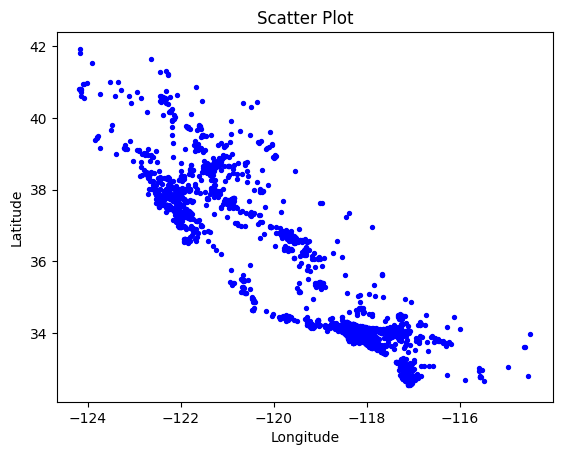

In [6]:
plt.scatter(X,Y,color = "blue",s=8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot')
plt.show()

In [7]:
# We start by defining the loss function: 
def Loss_Function(a,b,X,Y):
  total_error = 0
  for i in range(len(X)):
    total_error = total_error + (Y[i]-(a*X[i]+b))**2 
  return total_error/len(X)

In [8]:
# Now we define the Gradient Descent function: 
def gradient_descent(a,b,X,Y,L):
  a_grad = 0
  b_grad = 0

  for i in range(len(X)):
    a_grad += -(2/len(X))* X[i] * (Y[i] - (a * X[i] + b))
    b_grad += -(2/len(X)) * (Y[i] - (a * X[i] + b))
  
  a = a - a_grad *L
  b = b - b_grad *L
  return a, b, a_grad, b_grad 

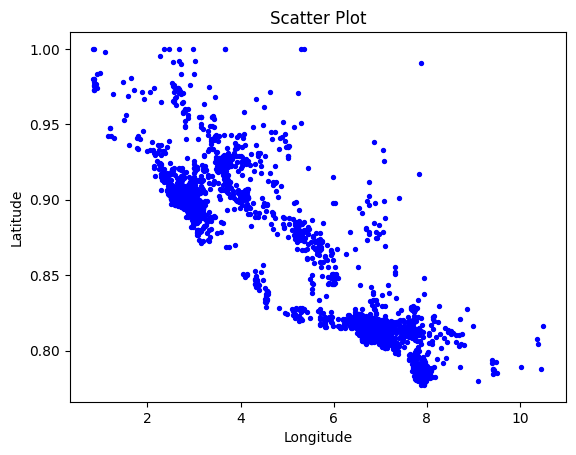

In [9]:
#Data Normalization: 
Y_ = Y
for i in range(len(X)):
  Y[i] = Y[i]/max(Y)
  X[i] = X[i]+125
plt.scatter(X,Y,color = "blue",s=8)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot')
plt.show()

In [ ]:
L = 0.01
a = 0
b = 0
epochs = 3000

for i in range(epochs):
  a,b,a_grad ,b_grad = gradient_descent(a,b,X,Y,L)
  print(a,b , a_grad, b_grad)

L = 0.001
epochs = 5000
for i in range(epochs): 
  a,b,a_grad ,b_grad = gradient_descent(a,b,X,Y,L)
  print(a,b , a_grad, b_grad)

0.09064229973214781 0.017098666683026894 -9.06422997321478 -1.7098666683026895
0.1191476924583415 0.02404641292457913 -2.850539272619369 -0.6947746241552236
0.12794217665940358 0.027770464662042527 -0.8794484201062085 -0.37240517374633936
0.13048441210514342 0.030468331462454517 -0.25422354457398333 -0.26978668004119905
0.1310438441892411 0.03283713037586209 -0.05594320840976821 -0.2368798913407574
0.13097485380356694 0.0350980138085888 0.00689903856741535 -0.22608834327267072
0.13070708543900608 0.03732114543623708 0.026776836456085164 -0.22231316276482818
0.13037683247721185 0.039528791252671724 0.03302529617942375 -0.22076458164346413
0.1300273294873719 0.041728022807291196 0.03495029898399537 -0.21992315546194707
0.1296722902982298 0.04392109154636679 0.035503918914208225 -0.21930687390755949
0.12931606397342907 0.04610871983155308 0.03562263248007154 -0.2187628285186294
0.1289600288258235 0.04829114493900028 0.03560351476055798 -0.21824251074472006
0.12860462076977475 0.0504684502

In [ ]:
# we found that 
# a = -0.023423598579074074
# b =  0.9815716944521793
plt.scatter(X,Y,color = "blue",s=8)
plt.plot(list(range(0,12)),[a*x+b for x in range(0,12)],color = 'red',linewidth= 3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot')
plt.show()

In [ ]:
#Prediction 
Longitude = -117.81 
x = Longitude+125
y = a*x + b 
Latitude = y*max(Y_)
print(Latitude)